In [292]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

Columns to check: Income<br>
Columns to drop: DanceActivities

In [214]:
df = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/DataMining_Proj_Group8/main/XYZ_sports_dataset.csv', sep=';')

In [215]:
df.head()

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,RacketActivities,CombatActivities,NatureActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
0,10000,60,Female,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,89.35,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7,NaN,6.28,2,0,0.0,0,0
1,10001,29,Female,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,479.20,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23.0,1,2.0,17.42,1,2,0.0,0,1
2,10002,23,Male,1980.0,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7,37.60,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0,7.0,30.03,6,0,0.0,0,1
3,10003,9,Male,0.0,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,22,155.40,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,20.0,2,2.0,17.72,3,0,0.0,0,1
4,10004,35,Male,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,373.20,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,41.0,0,7.0,60.97,0,3,0.0,0,1


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14942 entries, 0 to 14941
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          14942 non-null  int64  
 1   Age                         14942 non-null  int64  
 2   Gender                      14942 non-null  object 
 3   Income                      14447 non-null  float64
 4   EnrollmentStart             14942 non-null  object 
 5   EnrollmentFinish            14942 non-null  object 
 6   LastPeriodStart             14942 non-null  object 
 7   LastPeriodFinish            14942 non-null  object 
 8   DateLastVisit               14942 non-null  object 
 9   DaysWithoutFrequency        14942 non-null  int64  
 10  LifetimeValue               14942 non-null  float64
 11  UseByTime                   14942 non-null  int64  
 12  AthleticsActivities         14906 non-null  float64
 13  WaterActivities             149

In [217]:
df.columns

Index(['ID', 'Age', 'Gender', 'Income', 'EnrollmentStart', 'EnrollmentFinish',
       'LastPeriodStart', 'LastPeriodFinish', 'DateLastVisit',
       'DaysWithoutFrequency', 'LifetimeValue', 'UseByTime',
       'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
       'DanceActivities', 'TeamActivities', 'RacketActivities',
       'CombatActivities', 'NatureActivities', 'SpecialActivities',
       'OtherActivities', 'NumberOfFrequencies', 'AttendedClasses',
       'AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA',
       'RealNumberOfVisits', 'NumberOfRenewals', 'HasReferences',
       'NumberOfReferences', 'Dropout'],
      dtype='object')

In [218]:
df['Age'].value_counts()

Age
22    1187
21    1166
20     987
23     954
19     899
      ... 
79       4
85       3
84       2
86       1
87       1
Name: count, Length: 88, dtype: int64

In [219]:
df['Gender'].value_counts()

Gender
Female    8931
Male      6011
Name: count, dtype: int64

In [220]:
df['Income'].value_counts()

Income
0.0       2123
1890.0      84
1820.0      82
1970.0      80
1710.0      79
          ... 
8160.0       1
6510.0       1
6770.0       1
7810.0       1
6570.0       1
Name: count, Length: 737, dtype: int64

<Axes: >

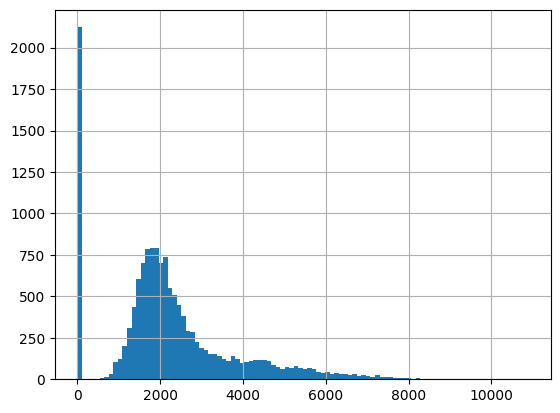

In [221]:
df['Income'].hist(bins=100)

<Axes: >

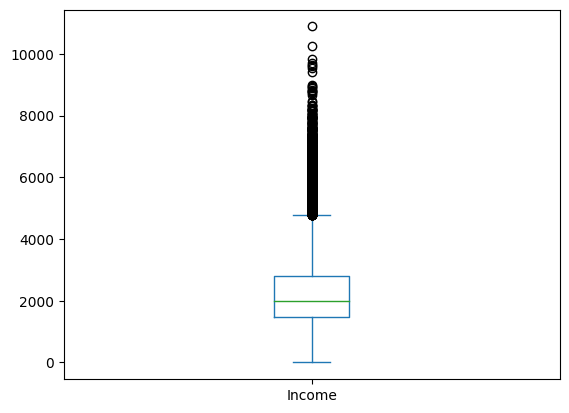

In [222]:
df['Income'].plot(kind='box')

In [223]:
df['EnrollmentStart'].value_counts()

EnrollmentStart
2015-03-02    92
2018-10-01    71
2014-09-29    69
2015-03-03    67
2016-03-01    62
              ..
2016-08-12     1
2018-06-21     1
2018-07-18     1
2017-07-14     1
2014-07-18     1
Name: count, Length: 1490, dtype: int64

In [224]:
df['EnrollmentFinish'].value_counts()

EnrollmentFinish
2015-09-16    1684
2016-07-31     890
2018-07-31     800
2019-10-31     735
2017-08-29     541
              ... 
2016-04-13       1
2017-12-29       1
2018-08-24       1
2019-05-16       1
2014-12-10       1
Name: count, Length: 1300, dtype: int64

In [225]:
df['LastPeriodStart'].value_counts()

LastPeriodStart
2019-07-01    3172
2016-01-01    1919
2018-01-01    1870
2019-01-01    1734
2015-01-01    1504
2017-01-01    1448
2018-07-01     838
2016-07-01     727
2015-07-01     674
2017-07-01     619
2014-07-01     432
2014-01-01       5
Name: count, dtype: int64

In [226]:
df['LastPeriodFinish'].value_counts()

LastPeriodFinish
2019-12-31    3694
2018-12-31    1748
2016-12-31    1722
2019-06-30    1501
2016-06-30    1197
2015-06-30    1017
2017-06-30     991
2018-06-30     987
2017-12-31     931
2015-12-31     853
2014-12-31     301
Name: count, dtype: int64

In [227]:
df['DateLastVisit'].value_counts()

DateLastVisit
2019-10-31    475
2019-10-30    438
2019-10-26    304
2019-10-29    278
2019-10-28    218
             ... 
2019-02-13      1
2014-12-13      1
2015-01-16      1
2016-01-09      1
2014-07-31      1
Name: count, Length: 1384, dtype: int64

In [228]:
df['DaysWithoutFrequency'].value_counts()

DaysWithoutFrequency
0       604
1       563
5       393
2       380
3       349
       ... 
392       1
709       1
474       1
1249      1
461       1
Name: count, Length: 660, dtype: int64

In [229]:
df['LifetimeValue'].value_counts()

LifetimeValue
43.60      188
53.60      146
47.20      129
37.60      124
83.60      118
          ... 
635.30       1
143.90       1
1061.25      1
275.90       1
919.60       1
Name: count, Length: 5668, dtype: int64

In [230]:
df['UseByTime'].value_counts()

UseByTime
0    14238
1      704
Name: count, dtype: int64

In [231]:
df['AthleticsActivities'].value_counts()

AthleticsActivities
0.0    14796
1.0      110
Name: count, dtype: int64

In [232]:
df['WaterActivities'].value_counts()

WaterActivities
0.0    10490
1.0     4415
Name: count, dtype: int64

In [233]:
df['FitnessActivities'].value_counts()

FitnessActivities
1.0    8587
0.0    6320
Name: count, dtype: int64

In [234]:
df['DanceActivities'].value_counts() 

DanceActivities
0.0    14906
Name: count, dtype: int64

In [235]:
df['TeamActivities'].value_counts()

TeamActivities
0.0    14079
1.0      828
Name: count, dtype: int64

In [236]:
df['RacketActivities'].value_counts()

RacketActivities
0.0    14556
1.0      349
Name: count, dtype: int64

In [237]:
df['CombatActivities'].value_counts()

CombatActivities
0.0    13300
1.0     1609
Name: count, dtype: int64

In [238]:
df['NatureActivities'].value_counts()

NatureActivities
0.0    14895
Name: count, dtype: int64

In [239]:
df['SpecialActivities'].value_counts()

SpecialActivities
0.0    14503
1.0      395
Name: count, dtype: int64

In [240]:
df['OtherActivities'].value_counts()

OtherActivities
0.0    14879
1.0       28
Name: count, dtype: int64

In [241]:
df['NumberOfFrequencies'].value_counts()

NumberOfFrequencies
2.0      661
3.0      623
1.0      609
4.0      583
5.0      556
        ... 
443.0      1
660.0      1
507.0      1
373.0      1
472.0      1
Name: count, Length: 415, dtype: int64

In [242]:
df['AttendedClasses'].value_counts()

AttendedClasses
0      10432
1        411
2        214
3        195
4        171
       ...  
268        1
312        1
139        1
290        1
202        1
Name: count, Length: 230, dtype: int64

In [243]:
df['AllowedWeeklyVisitsBySLA'].value_counts()

AllowedWeeklyVisitsBySLA
7.0    10505
2.0     2341
4.0      742
1.0      525
3.0      160
6.0      118
5.0       16
Name: count, dtype: int64

In [244]:
df['AllowedWeeklyVisitsBySLA'].value_counts()

AllowedWeeklyVisitsBySLA
7.0    10505
2.0     2341
4.0      742
1.0      525
3.0      160
6.0      118
5.0       16
Name: count, dtype: int64

In [245]:
df['AllowedNumberOfVisitsBySLA'].value_counts()

AllowedNumberOfVisitsBySLA
60.97    4462
17.42    1497
30.03    1205
28.98    1138
62.02     646
         ... 
32.58       1
0.86        1
53.57       1
17.15       1
15.87       1
Name: count, Length: 270, dtype: int64

In [246]:
df['RealNumberOfVisits'].value_counts()

RealNumberOfVisits
0     2698
1     1641
2     1635
3     1440
4     1323
5     1045
6      913
7      711
8      611
9      466
10     376
11     348
12     263
13     210
14     163
15     142
16     138
17     114
18      87
19      73
20      65
21      49
22      48
24      44
25      42
23      39
26      31
27      24
29      21
34      20
28      20
30      18
33      14
32      13
31      13
35       9
36       8
39       7
40       6
37       6
38       5
41       5
45       5
46       4
42       4
49       3
72       3
47       3
66       2
43       2
84       2
51       2
44       1
53       1
50       1
58       1
52       1
48       1
57       1
56       1
Name: count, dtype: int64

In [247]:
df['NumberOfRenewals'].value_counts()

NumberOfRenewals
0    6103
1    4020
2    2347
3    1209
4     733
5     444
6      86
Name: count, dtype: int64

In [248]:
df['HasReferences'].value_counts()

HasReferences
0.0    14633
1.0      297
Name: count, dtype: int64

In [249]:
df['NumberOfReferences'].value_counts() # check why there is difference on class 0 related to the 'HasReferences' column 
                                        # when it is 0 so no references

NumberOfReferences
0    14646
1      267
2       21
3        8
Name: count, dtype: int64

In [250]:
df['Dropout'].value_counts()

Dropout
1    11968
0     2974
Name: count, dtype: int64

In [251]:
# ProfileReport(df, title="Profile Report")

In [252]:
# profile = ProfileReport(df, title="Profile Report")
# profile.to_file(output_file="datamining_report.html")

In [253]:
# Alerts by the Profile Report 

# DanceActivities has constant value ""	Constant
# NatureActivities has constant value ""	Constant
# Age is highly overall correlated with Income and 2 other fields	High correlation
# Income is highly overall correlated with Age	High correlation
# DaysWithoutFrequency is highly overall correlated with RealNumberOfVisits	High correlation
# LifetimeValue is highly overall correlated with NumberOfFrequencies and 1 other fields	High correlation
# NumberOfFrequencies is highly overall correlated with LifetimeValue and 1 other fields	High correlation
# AttendedClasses is highly overall correlated with AllowedWeeklyVisitsBySLA and 1 other fields	High correlation
# AllowedWeeklyVisitsBySLA is highly overall correlated with AttendedClasses and 3 other fields	High correlation
# AllowedNumberOfVisitsBySLA is highly overall correlated with AttendedClasses and 1 other fields	High correlation
# RealNumberOfVisits is highly overall correlated with DaysWithoutFrequency	High correlation
# NumberOfRenewals is highly overall correlated with LifetimeValue and 1 other fields	High correlation
# LastPeriodStart is highly overall correlated with LastPeriodFinish and 1 other fields	High correlation
# LastPeriodFinish is highly overall correlated with LastPeriodStart and 1 other fields	High correlation
# WaterActivities is highly overall correlated with Age and 2 other fields	High correlation
# FitnessActivities is highly overall correlated with Age and 2 other fields	High correlation
# HasReferences is highly overall correlated with NumberOfReferences	High correlation
# NumberOfReferences is highly overall correlated with HasReferences	High correlation
# Dropout is highly overall correlated with LastPeriodStart and 1 other fields	High correlation
# UseByTime is highly imbalanced (72.6%)	Imbalance
# AthleticsActivities is highly imbalanced (93.7%)	Imbalance
# TeamActivities is highly imbalanced (69.1%)	Imbalance
# RacketActivities is highly imbalanced (84.0%)	Imbalance
# CombatActivities is highly imbalanced (50.6%)	Imbalance
# SpecialActivities is highly imbalanced (82.3%)	Imbalance
# OtherActivities is highly imbalanced (98.0%)	Imbalance
# HasReferences is highly imbalanced (85.9%)	Imbalance
# NumberOfReferences is highly imbalanced (92.4%)	Imbalance
# Income has 495 (3.3%) missing values	Missing
# AllowedWeeklyVisitsBySLA has 535 (3.6%) missing values	Missing
# ID is uniformly distributed	Uniform
# ID has unique values	Unique
# Income has 2123 (14.2%) zeros	Zeros
# DaysWithoutFrequency has 604 (4.0%) zeros	Zeros
# AttendedClasses has 10432 (69.8%) zeros	Zeros
# RealNumberOfVisits has 2698 (18.1%) zeros	Zeros
# NumberOfRenewals has 6103 (40.8%) zeros	Zeros

In [254]:
pd.set_option('display.max_columns', None)
df.head()

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,RacketActivities,CombatActivities,NatureActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
0,10000,60,Female,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,89.35,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7,NaN,6.28,2,0,0.0,0,0
1,10001,29,Female,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,479.20,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23.0,1,2.0,17.42,1,2,0.0,0,1
2,10002,23,Male,1980.0,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7,37.60,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0,7.0,30.03,6,0,0.0,0,1
3,10003,9,Male,0.0,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,22,155.40,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,20.0,2,2.0,17.72,3,0,0.0,0,1
4,10004,35,Male,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,373.20,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,41.0,0,7.0,60.97,0,3,0.0,0,1


In [255]:
df.groupby('Gender')['Income'].agg({'min','max','mean','median'})

,max,min,mean,median
Gender,,,,
Female,10890.0,0.0,2260.263401,1990.0
Male,9630.0,0.0,2186.800207,2000.0


## Data Cleaning

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14942 entries, 0 to 14941
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          14942 non-null  int64  
 1   Age                         14942 non-null  int64  
 2   Gender                      14942 non-null  object 
 3   Income                      14447 non-null  float64
 4   EnrollmentStart             14942 non-null  object 
 5   EnrollmentFinish            14942 non-null  object 
 6   LastPeriodStart             14942 non-null  object 
 7   LastPeriodFinish            14942 non-null  object 
 8   DateLastVisit               14942 non-null  object 
 9   DaysWithoutFrequency        14942 non-null  int64  
 10  LifetimeValue               14942 non-null  float64
 11  UseByTime                   14942 non-null  int64  
 12  AthleticsActivities         14906 non-null  float64
 13  WaterActivities             149

In [257]:
df.columns

Index(['ID', 'Age', 'Gender', 'Income', 'EnrollmentStart', 'EnrollmentFinish',
       'LastPeriodStart', 'LastPeriodFinish', 'DateLastVisit',
       'DaysWithoutFrequency', 'LifetimeValue', 'UseByTime',
       'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
       'DanceActivities', 'TeamActivities', 'RacketActivities',
       'CombatActivities', 'NatureActivities', 'SpecialActivities',
       'OtherActivities', 'NumberOfFrequencies', 'AttendedClasses',
       'AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA',
       'RealNumberOfVisits', 'NumberOfRenewals', 'HasReferences',
       'NumberOfReferences', 'Dropout'],
      dtype='object')

In [258]:
columns_to_fill = ['AthleticsActivities', 'WaterActivities', 'FitnessActivities','DanceActivities', 'TeamActivities', 'RacketActivities',
'CombatActivities', 'NatureActivities', 'SpecialActivities', 'OtherActivities', 'NumberOfFrequencies']
df[columns_to_fill] = df[columns_to_fill].apply(lambda col: col.fillna(0))

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14942 entries, 0 to 14941
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          14942 non-null  int64  
 1   Age                         14942 non-null  int64  
 2   Gender                      14942 non-null  object 
 3   Income                      14447 non-null  float64
 4   EnrollmentStart             14942 non-null  object 
 5   EnrollmentFinish            14942 non-null  object 
 6   LastPeriodStart             14942 non-null  object 
 7   LastPeriodFinish            14942 non-null  object 
 8   DateLastVisit               14942 non-null  object 
 9   DaysWithoutFrequency        14942 non-null  int64  
 10  LifetimeValue               14942 non-null  float64
 11  UseByTime                   14942 non-null  int64  
 12  AthleticsActivities         14942 non-null  float64
 13  WaterActivities             149

<Axes: >

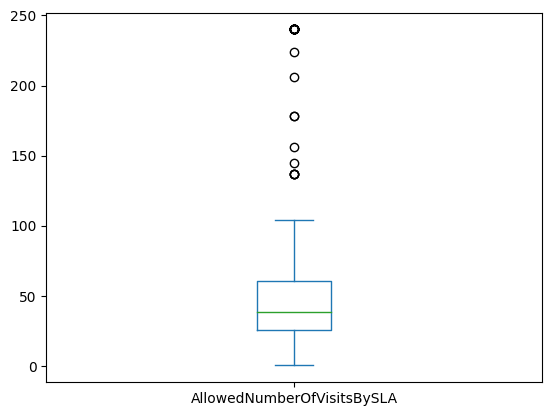

In [260]:
df['AllowedNumberOfVisitsBySLA'].plot(kind='box')

In [261]:
df['AllowedNumberOfVisitsBySLA'].describe()

count    14942.000000
mean        41.636299
std         21.066166
min          0.560000
25%         25.720000
50%         38.990000
75%         60.970000
max        240.030000
Name: AllowedNumberOfVisitsBySLA, dtype: float64

In [262]:
df[df['AllowedNumberOfVisitsBySLA']>120]

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,RacketActivities,CombatActivities,NatureActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
1158,11158,26,Male,1990.0,2015-03-17,2015-09-16,2015-01-01,2016-06-30,2015-06-02,106,181.60,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,0,7.0,240.03,1,1,0.0,0,1
1998,11998,17,Male,1130.0,2015-02-28,2015-09-16,2015-01-01,2016-06-30,2015-06-17,91,165.10,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,7.0,240.03,1,1,0.0,0,1
2203,12203,22,Female,2640.0,2015-03-09,2015-09-16,2015-01-01,2015-12-31,2015-05-11,128,112.60,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0,0,7.0,178.01,0,1,0.0,0,1
2328,12328,36,Female,2770.0,2015-03-05,2015-09-16,2015-01-01,2016-06-30,2015-06-27,81,178.60,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0,7.0,240.03,4,1,0.0,0,1
2943,12943,27,Male,1760.0,2014-06-18,2015-09-16,2015-01-01,2016-06-30,2015-05-12,127,160.60,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,4,7.0,240.03,0,2,1.0,0,1
2980,12980,32,Male,1980.0,2015-05-16,2015-09-16,2015-01-01,2016-06-30,2015-05-19,120,53.10,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,7.0,240.03,0,1,0.0,0,1
3090,13090,19,Female,1400.0,2015-03-04,2015-09-16,2015-01-01,2016-06-30,2015-04-07,162,118.27,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4,4.0,137.16,0,1,0.0,0,1
3177,13177,28,Male,2760.0,2015-04-01,2015-09-16,2015-01-01,2016-06-30,2015-04-29,140,152.10,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.0,0,7.0,240.03,0,1,0.0,0,1
3673,13673,30,Female,3540.0,2015-03-03,2015-09-16,2015-01-01,2016-06-30,2015-06-23,85,178.60,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0,7.0,240.03,6,1,0.0,0,1
4061,14061,62,Female,9840.0,2015-04-27,2015-09-16,2015-01-01,2016-06-30,2015-06-04,104,94.80,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0,7.0,240.03,1,1,0.0,0,1


In [263]:
df[df['Income'].isna()]

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,RacketActivities,CombatActivities,NatureActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
68,10068,43,Female,NaN,2016-09-16,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,849.80,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,214.0,0,7.0,21.98,9,3,0.0,0,1
76,10076,9,Male,NaN,2017-09-16,2017-09-16,2019-07-01,2019-12-31,2019-10-26,5,708.20,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,64,2.0,17.42,6,2,0.0,0,0
156,10156,37,Female,NaN,2016-03-16,2016-04-01,2016-01-01,2016-06-30,2016-03-21,11,41.60,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,2.0,4.58,1,0,0.0,0,1
158,10158,64,Female,NaN,2015-10-12,2016-04-20,2016-01-01,2016-06-30,2016-01-23,88,185.60,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,24.0,24,2.0,17.14,0,0,0.0,0,1
224,10224,7,Male,NaN,2016-04-20,2018-11-11,2018-07-01,2018-12-31,2018-10-25,17,836.60,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,107.0,91,2.0,11.72,6,3,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14804,24804,4,Female,NaN,2016-03-05,2016-03-05,2019-07-01,2019-12-31,2019-10-26,5,1656.30,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0,88,2.0,9.72,3,4,0.0,0,0
14836,24836,5,Male,NaN,2018-07-02,2018-07-02,2019-07-01,2019-12-31,2019-10-30,1,654.60,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20,2.0,15.42,9,2,0.0,0,0
14874,24874,15,Male,NaN,2015-11-02,2016-07-31,2016-01-01,2016-12-31,2016-05-30,62,353.60,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20.0,17,1.0,8.71,0,0,0.0,0,1
14930,24930,4,Male,NaN,2017-06-30,2017-11-07,2017-07-01,2017-12-31,2017-09-30,38,77.60,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5,2.0,17.42,7,1,0.0,0,1


When the Age is 16 or below the Income is 0

In [264]:
df[df['Age']<=16]['Income'].describe()

count    2161.000000
mean       33.993522
std       278.269317
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      3870.000000
Name: Income, dtype: float64

In [265]:
younger_16 = df[df['Age']<=16]['Income']
younger_16

3        0.0
9        0.0
13       0.0
25       0.0
31       0.0
        ... 
14913    0.0
14917    0.0
14919    0.0
14930    NaN
14937    0.0
Name: Income, Length: 2524, dtype: float64

In [266]:
(younger_16[younger_16==0].count()*100)/younger_16.shape[0]

84.11251980982567

As you can see the vast majority (84%) and also the median and the third quartile are equal to zero so in the next step we fill
the values of NaN's of people younger or equal to 16 with 0.

In [267]:
df[df['Age']<=16]['Income'].isna().sum()

363

In [268]:
df.loc[df['Age']<=16, 'Income'] = df.loc[df['Age']<=16, 'Income'].fillna(0)

In [269]:
df[df['Age']<=16]['Income'].isna().sum()

0

In [270]:
df['Income'].isna().sum()

132

So, after filling the NaN's of Income that are <= 16 of Age, we then have 132 missing values left. 

In [271]:
df[df['Age']>16]['Income'].median()

2150.0

In [272]:
df[(df['Age']>16)&(df['Income'].isna())]

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,RacketActivities,CombatActivities,NatureActivities,SpecialActivities,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
68,10068,43,Female,NaN,2016-09-16,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,849.80,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,214.0,0,7.0,21.98,9,3,0.0,0,1
156,10156,37,Female,NaN,2016-03-16,2016-04-01,2016-01-01,2016-06-30,2016-03-21,11,41.60,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,2.0,4.58,1,0,0.0,0,1
158,10158,64,Female,NaN,2015-10-12,2016-04-20,2016-01-01,2016-06-30,2016-01-23,88,185.60,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,24.0,24,2.0,17.14,0,0,0.0,0,1
259,10259,35,Female,NaN,2015-09-25,2016-04-04,2016-01-01,2016-06-30,2015-10-06,181,281.60,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,7.0,59.99,0,0,0.0,0,1
315,10315,22,Female,NaN,2018-04-17,2019-07-09,2019-01-01,2019-12-31,2019-06-24,15,98.50,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0,7.0,28.00,1,2,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14424,24424,19,Female,NaN,2015-03-11,2015-09-16,2015-01-01,2015-12-31,2015-04-27,142,88.60,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,7,2.0,17.42,0,1,0.0,0,1
14431,24431,21,Female,NaN,2015-05-13,2015-09-16,2015-01-01,2015-12-31,2015-07-10,68,62.85,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0,7.0,28.98,8,1,0.0,0,1
14574,24574,21,Male,NaN,2017-01-25,2017-02-24,2017-01-01,2017-06-30,2017-02-07,17,50.00,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0,7.0,30.03,3,0,0.0,0,1
14759,24759,20,Female,NaN,2019-10-07,2019-10-31,2019-07-01,2019-12-31,2019-10-17,14,50.70,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0,NaN,24.01,4,0,0.0,0,0


We then filled the rest of Income NaN´s (Age > 16) with the median of Income when Age > 16

In [273]:
df.loc[(df['Age']>16)&(df['Income'].isna()), 'Income'] = df.loc[(df['Age']>16)&(df['Income'].isna()), 'Income'].fillna(df[df['Age']>16]['Income'].median())

In [274]:
df['Income'].isna().sum()

0

In [275]:
df['AllowedWeeklyVisitsBySLA'].fillna(0)

0        0.0
1        2.0
2        7.0
3        2.0
4        7.0
        ... 
14937    4.0
14938    7.0
14939    7.0
14940    3.0
14941    7.0
Name: AllowedWeeklyVisitsBySLA, Length: 14942, dtype: float64

## Feature Selection

In [276]:
metric_features = ['Age','Income','DaysWithoutFrequency','LifetimeValue','NumberOfFrequencies','AttendedClasses','AllowedWeeklyVisitsBySLA',
                  'AllowedNumberOfVisitsBySLA','RealNumberOfVisits','NumberOfRenewals','NumberOfReferences']
non_metric_features = df.columns.drop(metric_features).to_list()

Between the metric_feature we are going to drop DaysWithoutFrequency, AllowedNumberOfVisitsBySLA, RealNumberOfVisits, 

In [277]:
items_to_remove = ['DaysWithoutFrequency', 'AllowedWeeklyVisitsBySLA', 'RealNumberOfVisits']
for item in items_to_remove:
    while item in metric_features:
        metric_features.remove(item)
    
metric_features

['Age',
 'Income',
 'LifetimeValue',
 'NumberOfFrequencies',
 'AttendedClasses',
 'AllowedNumberOfVisitsBySLA',
 'NumberOfRenewals',
 'NumberOfReferences']

In [278]:
scaler = StandardScaler()
df[metric_features] = scaler.fit_transform(df[metric_features])

In [279]:
df[metric_features]

,Age,Income,LifetimeValue,NumberOfFrequencies,AttendedClasses,AllowedNumberOfVisitsBySLA,NumberOfRenewals,NumberOfReferences
0,2.400674,2.106351,-0.585253,-0.474574,-0.108134,-1.678401,-0.872581,-0.133633
1,0.210807,0.287741,0.484860,-0.260600,-0.313943,-1.149574,0.575374,-0.133633
2,-0.213038,-0.124139,-0.727303,-0.520425,-0.348245,-0.550963,-0.872581,-0.133633
3,-1.202011,-1.378789,-0.403950,-0.306452,-0.279642,-1.135332,-0.872581,-0.133633
4,0.634652,1.358630,0.193897,0.014508,-0.348245,0.917792,1.299351,-0.133633
...,...,...,...,...,...,...,...,...
14937,-0.848806,-1.378789,3.178327,1.099660,2.944701,-0.322628,1.299351,-0.133633
14938,0.917216,-0.016416,0.113333,0.259050,-0.348245,0.917792,-0.872581,-0.133633
14939,-0.424961,-0.231861,-0.710833,-0.520425,-0.348245,-0.550963,-0.872581,-0.133633
14940,2.047470,1.662788,1.334143,2.215379,4.968491,-1.223154,0.575374,-0.133633


In [282]:
X = df[metric_features]

In [287]:
cluster_range = list(range(1,11))
inertia = []
def elbow_func(cluster):
  elbow_method = KMeans(n_clusters=cluster)
  elbow_method.fit(X)
  inertia.append(elbow_method.inertia_)
elbow_calculated = list(map(elbow_func, cluster_range))

C:\Users\sebas\anaconda3\envs\datam\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sebas\anaconda3\envs\datam\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sebas\anaconda3\envs\datam\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sebas\anaconda3\envs\datam\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

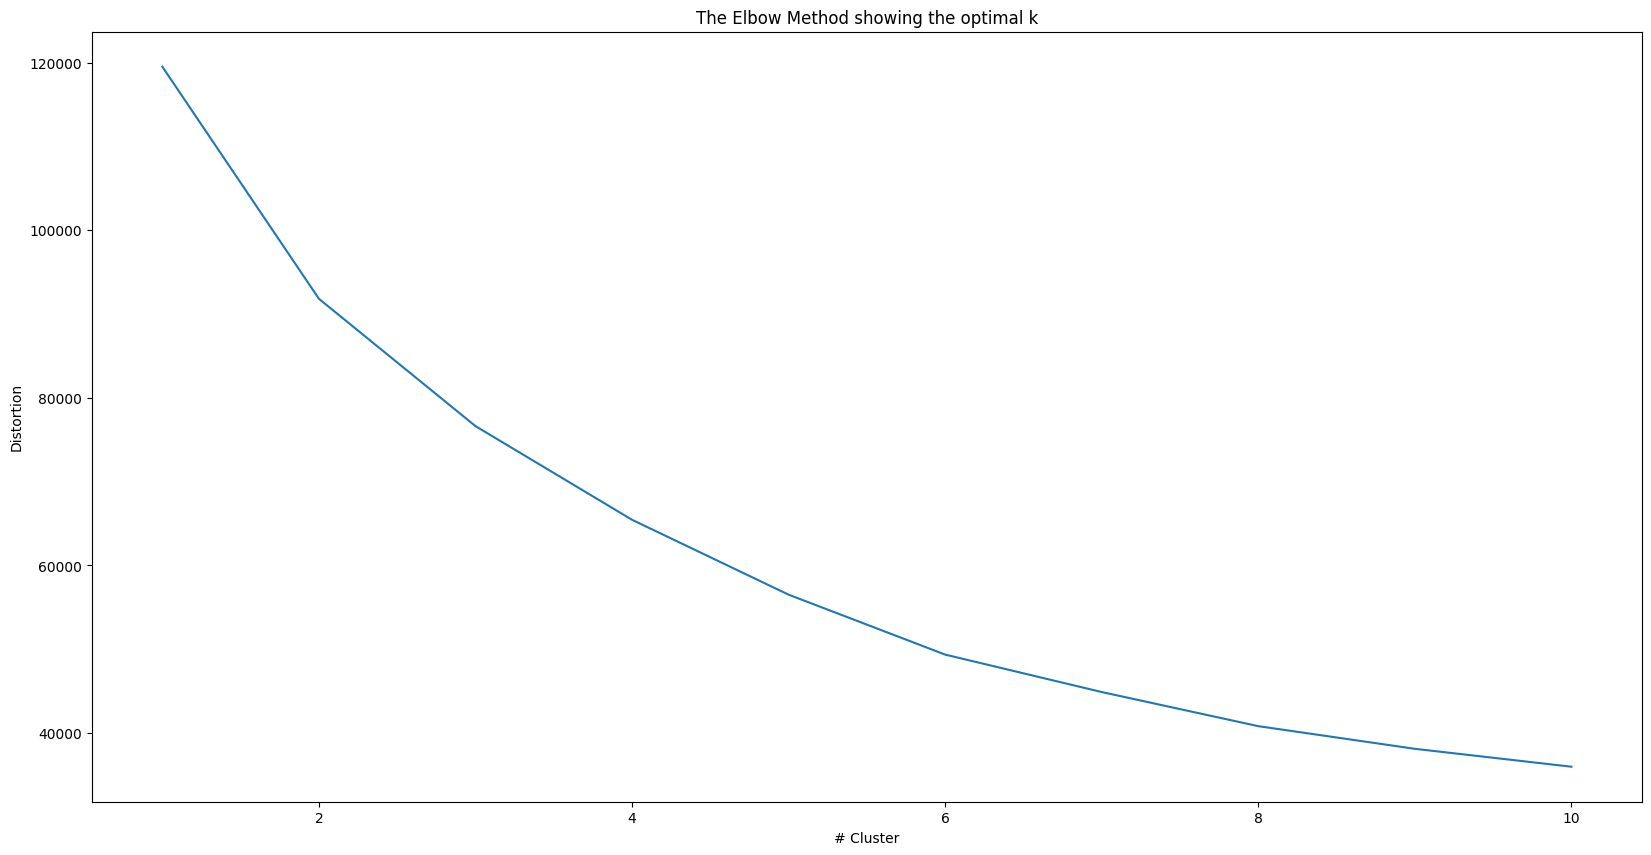

In [288]:
plt.figure(figsize=(20,10))
sns.lineplot(x = cluster_range, y = inertia);
plt.xlabel('# Cluster')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [290]:
silhouette_range = list(range(2,11))
inertia2 = []
def silhouette_func(silhouette):
  silhouette_method = KMeans(n_clusters=silhouette)
  silhouette_method.fit(X)
  return silhouette_score(X, silhouette_method.labels_)
silhouette_calculated = list(map(silhouette_func, silhouette_range))
print(silhouette_calculated)

C:\Users\sebas\anaconda3\envs\datam\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sebas\anaconda3\envs\datam\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sebas\anaconda3\envs\datam\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sebas\anaconda3\envs\datam\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

[0.4859362709781508, 0.33375079272530844, 0.3430244626895205, 0.27039809838149553, 0.2874574235555554, 0.28522952604050217, 0.300585039904419, 0.30602848894878937, 0.30880032910464233]


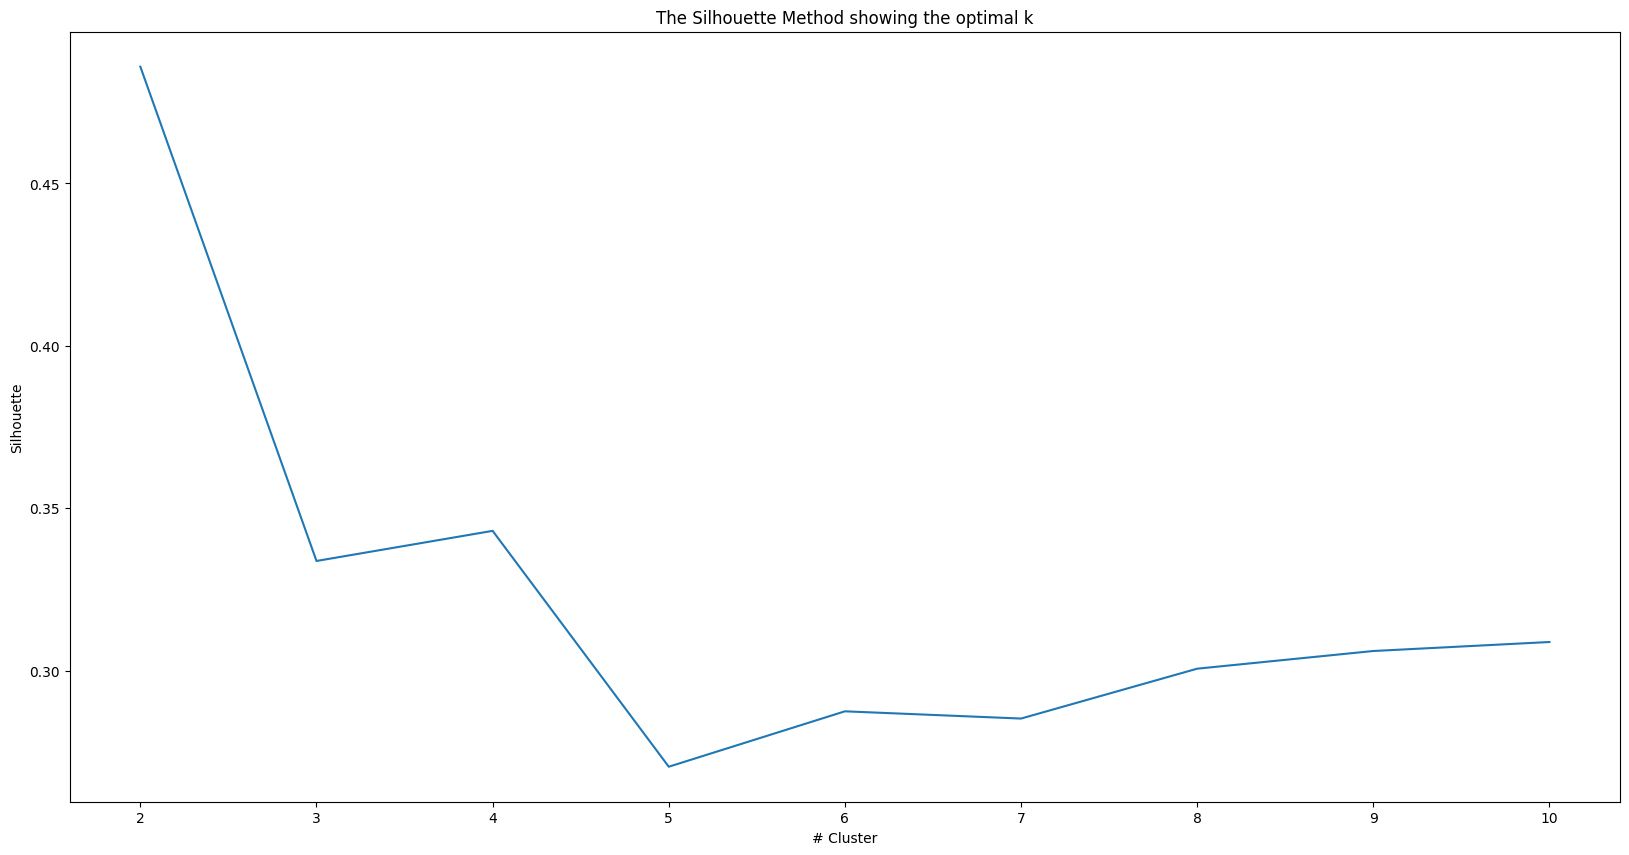

In [291]:
plt.figure(figsize=(20,10))
sns.lineplot(x = silhouette_range, y = silhouette_calculated);
plt.xlabel('# Cluster')
plt.ylabel('Silhouette')
plt.title('The Silhouette Method showing the optimal k')
plt.show()

C:\Users\sebas\anaconda3\envs\datam\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


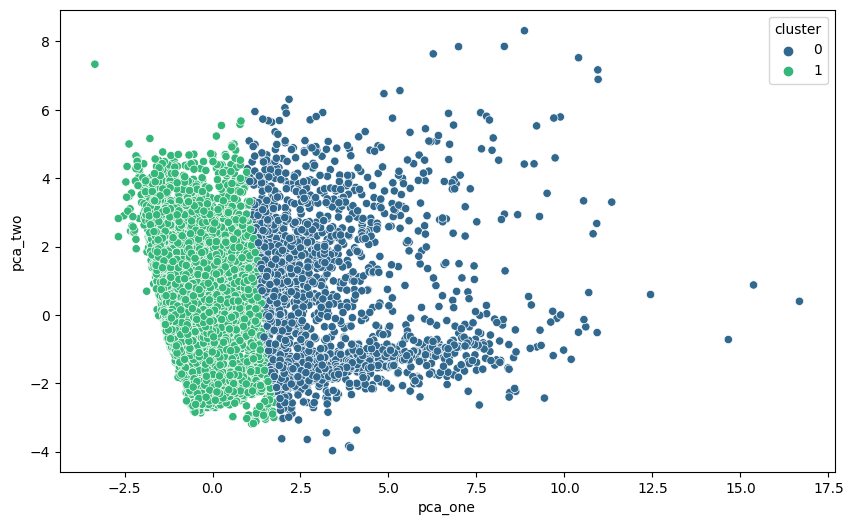

In [293]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=2)  # choose the appropriate number of clusters
df['cluster'] = kmeans.fit_predict(X)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[metric_features])
df['pca_one'] = pca_result[:, 0]
df['pca_two'] = pca_result[:, 1]

# Create a scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca_one', y='pca_two', hue='cluster', palette='viridis')

plt.show()